In [1]:
%load_ext autoreload
%autoreload 2

import train
import evaluate

In [2]:
params = train.CNNParams(
    embed_size=100,
    dropout=0.5,
    epochs=200,
    filters=[(33, 3), (33, 5), (33, 7)],
    num_layers=1,
    max_norm=3,
)

char_params = train.CharCNNParams(
    dropout=0.5,
    epochs=200,
    max_norm=3,
)

word_results, char_results = evaluate.run(
    params,
    char_params,
    training_sizes=[200, 800, 1600, 2400],
    window_sizes=[(0, 0)],
    k=10,
    kmeans_path="../clustered_data/15",
    num_clusters=15,
    num_clusters_gmm=18,
    use_cluster_cnn=False,
)

Creating dictionary: 100%|██████████| 17/17 [00:03<00:00,  5.37it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

200 training samples, 1132 testing samples


Creating dictionary: 100%|██████████| 17/17 [00:03<00:00,  4.61it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

800 training samples, 1132 testing samples


Creating dictionary: 100%|██████████| 17/17 [00:03<00:00,  4.75it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

1600 training samples, 1132 testing samples


Creating dictionary: 100%|██████████| 17/17 [00:03<00:00,  4.78it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

2400 training samples, 1132 testing samples


100%|██████████| 10/10 [25:34<00:00, 152.73s/it]


In [3]:
df_window0 = evaluate.results_to_dataframe(word_results, char_results)

In [4]:
#%store -r
%store df_window0

Stored 'df_window0' (DataFrame)


                                  score                    
                                   mean       std         p
size model    method   window                              
200  TokenCNN Baseline 0       0.831335  0.011848       NaN
              K-Means  0       0.843846  0.014898  0.031170
              GMM      0       0.842445  0.010787  0.030924
     CharCNN  Baseline 0       0.855736  0.011701       NaN
              K-Means  0       0.851318  0.014746  0.206388
              GMM      0       0.851584  0.022158  0.586711
800  TokenCNN Baseline 0       0.842933  0.010159       NaN
              K-Means  0       0.850113  0.005171  0.045224
              GMM      0       0.859137  0.014198  0.005521
     CharCNN  Baseline 0       0.867169  0.018861       NaN
              K-Means  0       0.863595  0.021780  0.722963
              GMM      0       0.880255  0.017785  0.141477
1600 TokenCNN Baseline 0       0.849773  0.006378       NaN
              K-Means  0       0.859235 

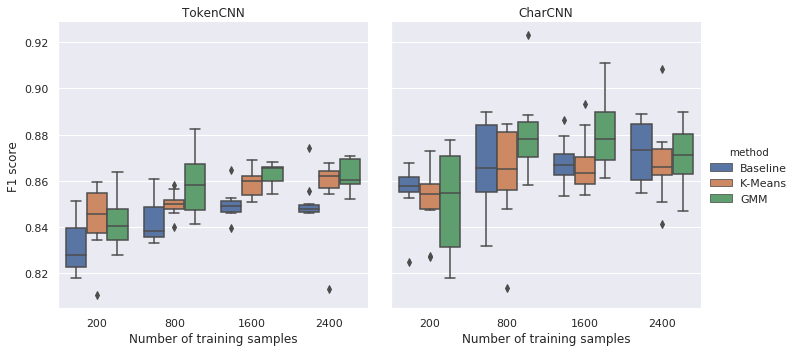

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel

df = df_window0
def p(s):
    i = s.keys()[0]
    size = df.iloc[i]["size"]
    window = df.iloc[i]["window"]
    method = df.iloc[i]["method"]
    model = df.iloc[i]["model"]

    baseline_scores = df[(df["size"] == size) & (df["model"] == model) & (df["window"] == window) & (df["method"] == "Baseline")].score
    scores = s.tolist()
    return ttest_rel(baseline_scores, scores)[1]

evaluate.plot_sns(df)
print(df.groupby(["size", "model", "method", "window"], sort=False).aggregate([np.mean, np.std, p]))

dir = "concat_window0"
os.makedirs(dir, exist_ok=True)
os.chdir(dir)

#try:
#    plt.savefig("plot.pdf")
#    df.groupby(["size", "model", "method", "window"], sort=False).aggregate([np.mean, np.std, p]).to_latex("table.tex")
#    df.groupby(["size", "model", "method", "window"], sort=False).aggregate([np.mean, np.std, p]).to_csv("table.csv")
#except e:
#    print(e)
#finally:
#    os.chdir("..")